Matheus Silva dos Santos - 22052573 <br>
Felipe Fraxe Filho - 22251894

## Atividade Prática 6: Projeto de Experimentos (2^k fatorial)

In [1]:
# Importações necessárias

from itertools import product, combinations
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_table(df):
    _, ax = plt.subplots(figsize=(12, 6))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    plt.show()

#### Script com entrada direto de um arquivo


In [3]:
# Exemplo de input com um arquivo

import gdown

gdown.download("https://drive.google.com/uc?id=1-kji1LCw5-nK36alwW3bJSYC5cNyCYQN", 'input.txt', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-kji1LCw5-nK36alwW3bJSYC5cNyCYQN
To: /content/input.txt
100%|██████████| 40.0/40.0 [00:00<00:00, 31.6kB/s]


'input.txt'

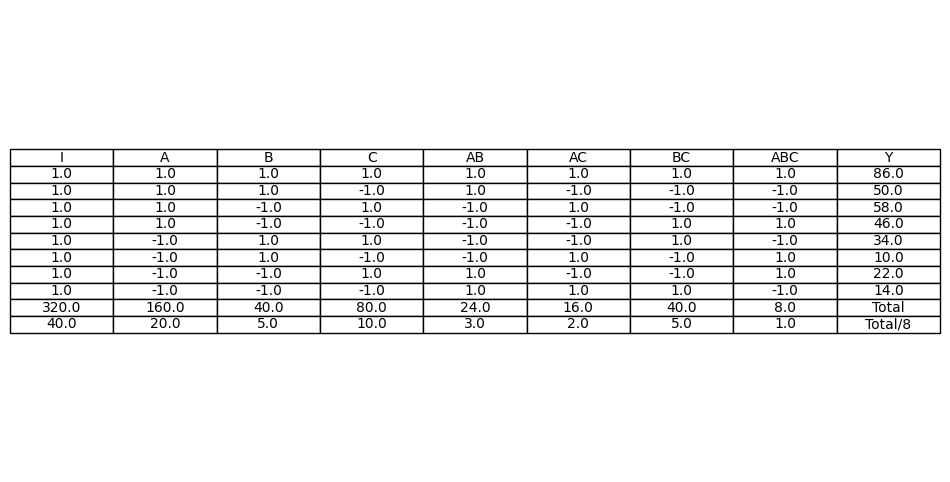

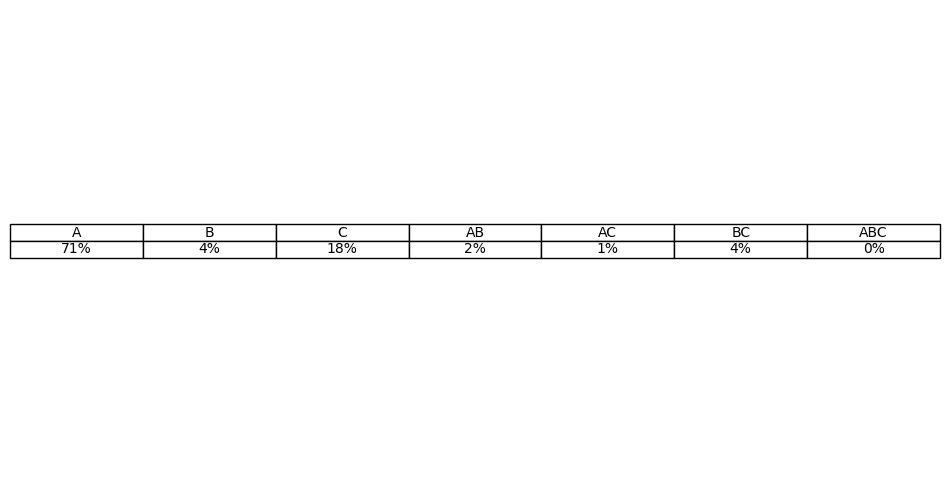

In [7]:
values = None
with open("input.txt", "r") as file:
    values = file.readlines()
k = int(values[0].strip())
factors = [0] * 3
for i in range(3):
    vals = values[i+1].strip().split(',')
    vals[0], vals[1] = int(vals[0]), int(vals[1])
    factors[i] = tuple(vals)

num_executions = int(values[4])
factors_combinations = product(*factors)

results = [0] * (2 ** k)
for i in range(5, len(values)):
    results[i-5] += int(values[i])

for i in range(len(results)):
    results[i] /= num_executions

data = []
for i, combo in enumerate(factors_combinations):
    row = [1]
    for j, factor in enumerate(factors):
        if combo[j] == factor[0]:
            row.append(1)
        else:
            row.append(-1)

    for n in range(2, k+1):
        for combination in combinations(range(0, k), n):
            res = 1
            for index in combination:
                res *= row[index+1]
            row.append(res)
    data.append(row + [results[i]])

totals = [0] * (len(data[0]))
for row in data:
    val = row[-1]
    for i, col in enumerate(row[:-1]):
        totals[i] += (col * val)
totals[-1] = "Total"
data.append(totals)

totals_div = [num / (2 ** k) for num in totals[:-1]]
totals_div.append(f"Total/{2 ** k}")
data.append(totals_div)

columns = ['I'] + [chr(65 + i) for i in range(k)]
tmp = columns[1:]
for i in range(2, k+1):
    for combination in combinations(tmp, i):
        columns.append(''.join(combination))
columns += ['Y']

plot_table(pd.DataFrame(data, columns=columns))


Q_terms = [(2 ** k) * num ** 2 for num in data[-1][1:-1]]
SST = sum(Q_terms)

plot_table(pd.DataFrame([[f"{round((q * 100) / SST)}%" for q in Q_terms]], columns=columns[1:-1]))

Este experimento envolve três fatores, A, B e C, cada um variando entre dois níveis: um nível baixo (-1) e um nível alto (+1). Os fatores e seus níveis são os seguintes (de acordo com o arquivo input.txt de exemplo):

- Fator A: 16 (alto), 4 (baixo)
- Fator B: 2 (alto), 1 (baixo)
- Fator C: 2 (alto), 1 (baixo)

Cada combinação de fatores foi repetida uma vez (num_executions = 1). Os resultados observados para cada combinação estão na tabela abaixo.

**Tabela de Sinais e Resultados Observados**

| I | A | B | C | AB | AC | BC | ABC | Y   |
|---|---|---|---|----|----|----|-----|-----|
| 1 | 1 | 1 | 1 | 1  | 1  | 1  | 1   | 86  |
| 1 | 1 | 1 | -1| -1 | -1 | -1 | -1  | 50  |
| 1 | 1 | -1| 1 | -1 | 1  | -1 | -1  | 58  |
| 1 | 1 | -1| -1| -1 | -1 | 1  | 1   | 46  |
| 1 | -1| 1 | 1 | -1 | -1 | 1  | -1  | 34  |
| 1 | -1| 1 | -1| -1 | 1  | -1 | 1   | 10  |
| 1 | -1| -1| 1 | 1  | -1 | -1 | 1   | 22  |
| 1 | -1| -1| -1| 1  | 1  | 1  | -1  | 14  |
|320|160| 40| 80| 24 | 16 | 40 | 8   | Total|
| 40| 20|  5| 10|  3 |  2 |  5 | 1   | Total/8|

**Análise de Variância**

A Análise de Variância nos permite identificar a fração de variação explicada por cada fator e suas interações.

**Fração de Variação Explicada**

- **Fator A (71%)**: Este é o fator mais influente no experimento, explicando a maior parte da variação nos resultados. A influência dominante de A sugere que mudanças no nível de A têm um grande impacto no resultado Y.
  
- **Fator B (4%)**: Este fator tem uma influência menor em comparação a A, mas ainda assim significativa. Mudanças no nível de B têm algum impacto no resultado Y, mas são menos pronunciadas.

- **Fator C (18%)**: Este fator tem uma influência moderada. As mudanças no nível de C também têm um impacto notável no resultado Y, mas não tanto quanto A.

- **Interação AB (2%)**: A interação entre A e B explica uma pequena parte da variação. Isso indica que os efeitos combinados de A e B sobre Y não são tão significativos.

- **Interação AC (1%)**: A interação entre A e C tem um efeito menor, mas não é desprezível. Isso sugere que há alguma dependência entre A e C.

- **Interação BC (4%)**: A interação entre B e C tem um impacto comparável ao fator B sozinho, sugerindo que as mudanças nos níveis de B e C em conjunto têm um efeito notável no resultado Y.

- **Interação ABC (0%)**: A interação de três fatores A, B e C juntos é insignificante, indicando que o efeito combinado de todos os três fatores é praticamente inexistente.

**Conclusão**

Com base na análise acima, podemos concluir o seguinte:

1. **Fator A** é o mais significativo, explicando 71% da variação total. Isso indica que a variável sob estudo é altamente sensível a mudanças no fator A. Qualquer esforço para otimizar o processo deve primeiro considerar ajustes no nível do fator A.
   
2. **Fator C** também tem uma influência considerável (18%), sugerindo que ele deve ser monitorado e controlado cuidadosamente.

3. **Fator B** e as **interações BC** têm uma influência menor mas não desprezível (4% cada). As interações AB e AC são menos significativas, e a interação ABC é praticamente insignificante.

4. Ao realizar o experimento, se o objetivo for minimizar ou maximizar Y, as principais atenções devem ser direcionadas para os níveis de A, seguido por C, e depois B. As interações entre os fatores devem ser consideradas, mas são menos críticas.

#### Script com input do usuário (Necessário reiniciar o ambiente se caso foi executado o script anterior!)

Escolha a quantidade de fatores entre k=2 e k=5: 2
Escolha os valores do fator A:
Maior valor (+1): 5
Menor valor (-1): 1
Escolha os valores do fator B:
Maior valor (+1): 8
Menor valor (-1): 2
Informe quantas vezes cada execução piloto será repetida: 1
Informe os resultados para a combinação (5, 8):
Resultado da execução piloto 1: 10
Informe os resultados para a combinação (5, 2):
Resultado da execução piloto 1: 5
Informe os resultados para a combinação (1, 8):
Resultado da execução piloto 1: 3
Informe os resultados para a combinação (1, 2):
Resultado da execução piloto 1: 2


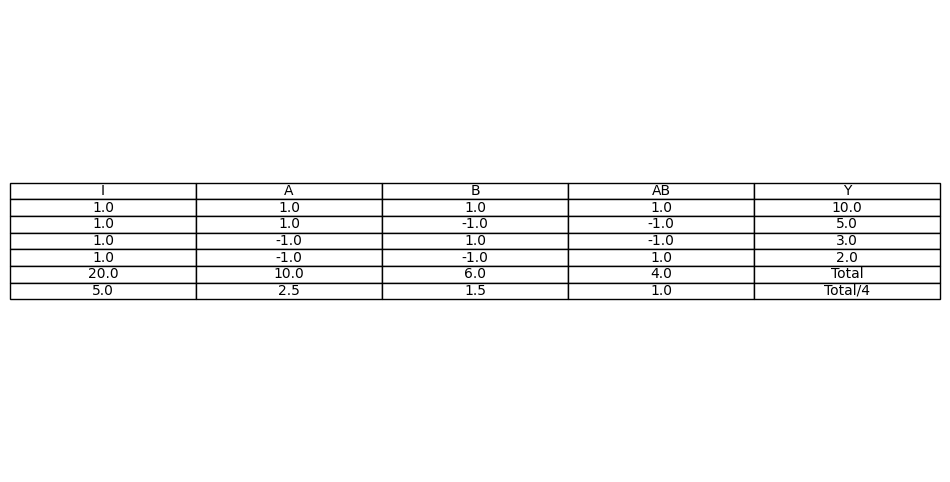

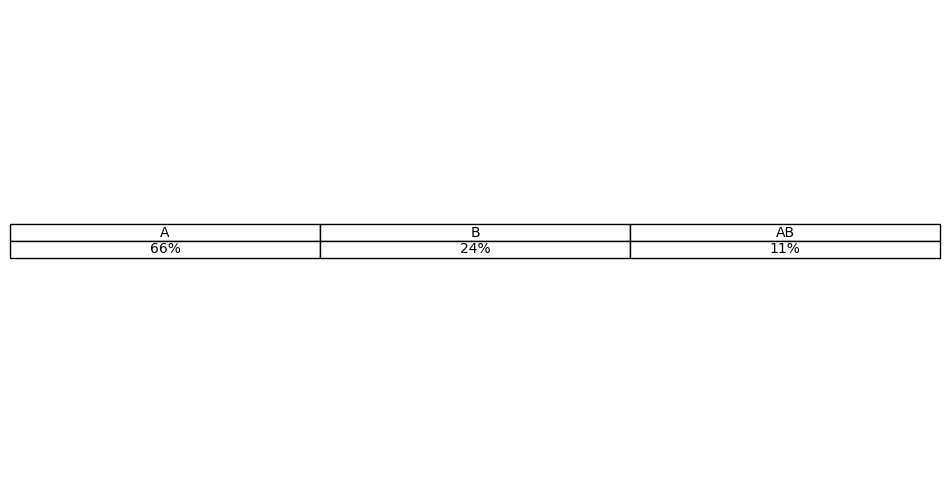

In [13]:
# Solicitar a quantidade de fatores (k)
k = -1
while not 5 >= k >= 2:
    k = int(input("Escolha a quantidade de fatores entre k=2 e k=5: "))

# Solicitar os valores máximo (+1) e mínimo (-1) para cada fator
factors = [0] * k
for i in range(k):
    print(f"Escolha os valores do fator {chr(65 + i)}:")
    max_val = int(input("Maior valor (+1): "))
    min_val = int(input("Menor valor (-1): "))
    factors[i] = (max_val, min_val)

# Solicitar o número de repetições para cada execução piloto
num_executions = int(input("Informe quantas vezes cada execução piloto será repetida: "))

# Gerar todas as combinações de fatores
factors_combinations = list(product(*factors))

# Inicializar os resultados
results = [0] * (2 ** k)

# Solicitar os resultados das execuções piloto para cada combinação de fatores
for i, combo in enumerate(factors_combinations):
    print(f"Informe os resultados para a combinação {combo}:")
    for _ in range(num_executions):
        results[i] += int(input(f"Resultado da execução piloto {_ + 1}: "))

# Calcular a média dos resultados
for i in range(len(results)):
    results[i] /= num_executions

# Preparar os dados para a tabela de sinais
data = []
for i, combo in enumerate(factors_combinations):
    row = [1]
    for j, factor in enumerate(factors):
        if combo[j] == factor[0]:
            row.append(1)
        else:
            row.append(-1)
    for n in range(2, k+1):
        for combination in combinations(range(0, k), n):
            res = 1
            for index in combination:
                res *= row[index+1]
            row.append(res)
    data.append(row + [results[i]])

# Calcular os totais
totals = [0] * (len(data[0]))
for row in data:
    val = row[-1]
    for i, col in enumerate(row[:-1]):
        totals[i] += (col * val)
totals[-1] = "Total"
data.append(totals)

# Calcular os totais divididos
totals_div = [num / (2 ** k) for num in totals[:-1]]
totals_div.append(f"Total/{2 ** k}")
data.append(totals_div)

# Definir os nomes das colunas
columns = ['I'] + [chr(65 + i) for i in range(k)]
tmp = columns[1:]
for i in range(2, k+1):
    for combination in combinations(tmp, i):
        columns.append(''.join(combination))
columns += ['Y']

# Exibir a tabela de sinais e os resultados
plot_table(pd.DataFrame(data, columns=columns))

# Calcular os termos quadráticos
Q_terms = [(2 ** k) * num ** 2 for num in data[-1][1:-1]]
SST = sum(Q_terms)

# Exibir a fração de variação explicada por cada fator
plot_table(pd.DataFrame([[f"{round((q * 100) / SST)}%" for q in Q_terms]], columns=columns[1:-1]))


O experimento fatorial $(2^k)$ acima foi conduzido com dois fatores (A e B), cada um variando entre dois níveis: o maior valor (+1) e o menor valor (-1). A tabela de sinais foi gerada para todas as combinações possíveis dos fatores. Os resultados foram obtidos para cada combinação e a fração de variação explicada por cada fator foi calculada.

**Parâmetros do Experimento**

- **Fatores:**
  - Fator A: [5 (nível +1), 1 (nível -1)]
  - Fator B: [8 (nível +1), 2 (nível -1)]
- **Execuções piloto por combinação:** 1

**Resultados Coletados**

| A  | B  | Y  |
|---|---|---|
| 5 | 8 | 10 |
| 5 | 2 | 5  |
| 1 | 8 | 3  |
| 1 | 2 | 2  |

**Tabela de Sinais e Resultados Médios**

A tabela de sinais gerada para as combinações dos fatores A e B e os resultados médios são apresentados a seguir:

| I  | A  | B  | AB | Y  |
|---|---|---|---|---|
| 1 | 1 | 1 | 1 | 10.0 |
| 1 | 1 | -1| -1| 5.0  |
| 1 | -1| 1 | -1| 3.0  |
| 1 | -1| -1| 1 | 2.0  |
| 20.0| 10.0| 6.0| 4.0| Total |
| 5.0| 2.5 | 1.5 | 1.0 | Total/4 |

**Cálculo dos Totais e Médias**

Os totais para cada coluna foram calculados como a soma dos produtos dos sinais e os resultados. Os totais foram então divididos por $(2^k)$ para obter as médias.

- **Total:** [20.0, 10.0, 6.0, 4.0]
- **Total/4:** [5.0, 2.5, 1.5, 1.0]

**Análise da Variância**

A Análise da Variância foi realizada para determinar a fração de variação explicada por cada fator do experimento.

- **Termos Quadráticos (Q):**
  Cada fator e interação teve seu "termo quadrático" calculado, o que basicamente representa a contribuição de cada um para a variação total nos resultados.

  - Para o fator A, o termo quadrático foi calculado como 25.
  - Para o fator B, o termo quadrático foi 9.
  - Para a interação entre os fatores A e B, o termo quadrático foi 4.

- **Soma Total dos Quadrados (SST):**
  A soma total dos quadrados é a soma de todos os termos quadráticos, que resultou em 38.

- **Fração de Variação Explicada:**
  A fração de variação explicada por cada fator foi determinada dividindo o termo quadrático de cada fator pela soma total dos quadrados e convertendo o resultado em porcentagem.

  - O fator A explica aproximadamente 66% da variação total nos resultados.
  - O fator B explica cerca de 24% da variação total.
  - A interação entre os fatores A e B explica cerca de 11% da variação total.

**Conclusão**

A partir dos resultados e da análise da variância, podemos tirar as seguintes conclusões sobre o experimento:

1. **Fator A (66%)**: O fator A é o que mais contribui para a variação dos resultados. Com uma fração de variação explicada de 66%, ele tem o maior impacto no resultado Y.
  
2. **Fator B (24%)**: O fator B também contribui significativamente para a variação dos resultados, embora menos que o fator A. Sua fração de variação explicada é de 24%.

3. **Interação AB (11%)**: A interação entre os fatores A e B também tem um impacto, embora menor, com uma fração de variação explicada de 11%. Isso indica que a combinação dos níveis dos fatores A e B afeta o resultado, mas não tanto quanto cada fator individualmente.

Esses resultados mostram que, para otimizar o resultado Y, deve-se focar principalmente no ajuste do fator A, seguido pelo fator B e, em menor grau, considerar a interação entre os fatores A e B. Essa análise é crucial para entender como cada fator influencia o processo e pode ajudar na tomada de decisões para melhorar o desempenho ou a eficiência do sistema avaliado.

#### Conclusão Geral sobre o Projeto de Experimento


O experimento 2^k fatorial permite a identificação de quais fatores têm o maior impacto na variável de resposta

Uma das grandes vantagens deste método é a capacidade de investigar as interações entre diferentes fatores. A interação entre fatores pode ter um efeito significativo na resposta, muitas vezes maior do que os efeitos dos fatores individuais. Compreender essas interações pode levar a uma otimização mais eficaz dos processos.

O design fatorial 2^k é altamente eficiente, especialmente quando comparado a outras abordagens experimentais. Ele permite a avaliação simultânea de múltiplos fatores com um número relativamente pequeno de experimentos, economizando tempo e recursos.

A análise de resultados de um experimento fatorial 2^k é direta e permite uma visualização clara das contribuições de cada fator e de suas interações. Isso facilita a tomada de decisões informadas sobre como ajustar os fatores para obter os resultados desejados.

Este método pode ser aplicado em uma variedade de contextos, desde a otimização de processos industriais até a melhoria de formulações de produtos e o desenvolvimento de novos materiais. Sua versatilidade o torna uma ferramenta essencial em qualquer área onde a experimentação é necessária.

A importância dos experimentos do tipo 2^k fatorial reside em sua capacidade de fornecer uma compreensão profunda e abrangente dos fatores que influenciam um processo ou sistema. Eles são fundamentais para a melhoria contínua e a inovação, permitindo aos cientistas e engenheiros identificar os caminhos mais eficientes para alcançar os objetivos desejados. Através da utilização deste método, é possível alcançar uma maior qualidade, eficiência e eficácia nos processos, resultando em produtos e serviços superiores.